In [1]:
using Distributions

In [2]:
using PyPlot

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


In [107]:
T = 500
ϕ = [.25,.5,.75,.8,.9,1]
ε = randn(T);

In [108]:
L = length(ϕ)

6

In [109]:
x = zeros(T,L)
x[1] = 0.0

0.0

In [110]:
for i = 1:L
    for t = 2:T
        x[t,i] = ϕ[i] * x[t-1] + ε[t]
    end
end

In [111]:
x

500×6 Array{Float64,2}:
  0.0         0.0          0.0         0.0        0.0          0.0     
  1.28616     1.28616      1.28616     1.28616    1.28616      1.28616 
  0.399245    0.720785     1.04232     1.10663    1.23525      1.36386 
 -0.420959   -0.321148    -0.221337   -0.201374  -0.16145     -0.121525
 -0.0824096  -0.187649    -0.292889   -0.313937  -0.356033    -0.398129
  0.98157     0.960968     0.940365    0.936245   0.928004     0.919763
 -0.885207   -0.639814    -0.394422   -0.345343  -0.247186    -0.149029
  0.311225    0.0899229   -0.131379   -0.175639  -0.26416     -0.352681
 -1.37753    -1.29972     -1.22192    -1.20636   -1.17523     -1.14411 
 -0.814916   -1.1593      -1.50368    -1.57256   -1.71031     -1.84806 
  0.872135    0.668406     0.464677    0.423931   0.342439     0.260948
 -1.58019    -1.36216     -1.14412    -1.10052   -1.0133      -0.92609 
  0.255742   -0.139306    -0.534354   -0.613363  -0.771382    -0.929401
  ⋮                                     

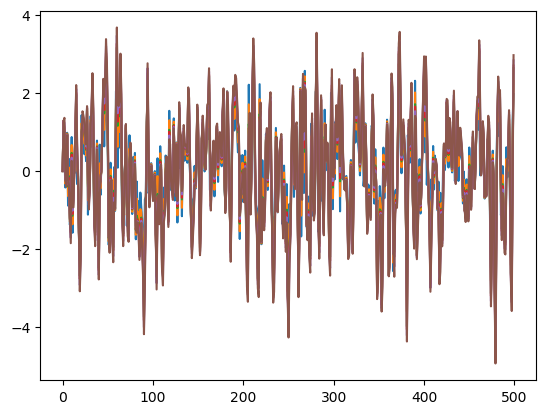

In [112]:
plot(x);

In [113]:
function linregress(y, X)
    β = X \ y
    yhat = β * X
    resids = y - yhat
    return(β, resids)
end;

In [114]:
a1 = x[1:T-1,1];
b1 = x[2:end,1];
a2 = x[1:T-1,2];
b2 = x[2:end,2];
a3 = x[1:T-1,3];
b3 = x[2:end,3];
a4 = x[1:T-1,4];
b4 = x[2:end,4];
a5 = x[1:T-1,5];
b5 = x[2:end,5];
a6 = x[1:T-1,6];
b6 = x[2:end,6];

In [115]:
β_hat1, resids1 = linregress(a1, b1);
β_hat2, resids2 = linregress(a2, b2);
β_hat3, resids3 = linregress(a3, b3);
β_hat4, resids4 = linregress(a4, b4);
β_hat5, resids5 = linregress(a5, b5);
β_hat6, resids6 = linregress(a6, b6);

In [116]:
β_hat = [β_hat1, β_hat2, β_hat3, β_hat4, β_hat5, β_hat6];
resids = [resids1, resids2, resids3, resids4, resids5, resids6];

In [73]:
α = [.01, .05, .10];

In [77]:
import Pkg; Pkg.add("HypothesisTests")

  Updating registry at `C:\Users\Aaron Becker\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed RecipesBase ───── v0.7.0
 Installed Combinatorics ─── v0.7.0
 Installed Roots ─────────── v0.8.4
 Installed FillArrays ────── v0.8.5
 Installed HypothesisTests ─ v0.8.0
 Installed Polynomials ───── v0.6.0
  Updating `C:\Users\Aaron Becker\.julia\environments\v1.3\Project.toml`
  [09f84164] + HypothesisTests v0.8.0
  Updating `C:\Users\Aaron Becker\.julia\environments\v1.3\Manifest.toml`
  [861a8166] + Combinatorics v0.7.0
  [1a297f60] ↑ FillArrays v0.8.4 ⇒ v0.8.5
  [09f84164] + HypothesisTests v0.8.0
  [f27b6e38] + Polynomials v0.6.0
  [3cdcf5f2] + RecipesBase v0.7.0
  [f2b01f46] + Roots v0.8.4


In [78]:
using HypothesisTests

┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1273


In [82]:
OneSampleTTest(mean(resids[1]), std(resids[1]), length(resids[1]), 0)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.015229338284912422
    95% confidence interval: (-0.0682, 0.0986)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7199

Details:
    number of observations:   499
    t-statistic:              0.35882688485986947
    degrees of freedom:       498
    empirical standard error: 0.04244202128516609


In [83]:
OneSampleTTest(mean(resids[2]), std(resids[2]), length(resids[2]), 0)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.01476911098956377
    95% confidence interval: (-0.0694, 0.0989)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7303

Details:
    number of observations:   499
    t-statistic:              0.3449298386121497
    degrees of freedom:       498
    empirical standard error: 0.04281772504515226


In [84]:
OneSampleTTest(mean(resids[3]), std(resids[3]), length(resids[3]), 0)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.014636496180091442
    95% confidence interval: (-0.0729, 0.1022)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7426

Details:
    number of observations:   499
    t-statistic:              0.328547609761381
    degrees of freedom:       498
    empirical standard error: 0.044549087393214344


In [85]:
OneSampleTTest(mean(resids[4]), std(resids[4]), length(resids[4]), 0)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.014731387406713297
    95% confidence interval: (-0.074, 0.1034)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7443

Details:
    number of observations:   499
    t-statistic:              0.32634517311510347
    degrees of freedom:       498
    empirical standard error: 0.045140509559543775


In [86]:
OneSampleTTest(mean(resids[5]), std(resids[5]), length(resids[5]), 0)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.01505945194560011
    95% confidence interval: (-0.0765, 0.1066)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7467

Details:
    number of observations:   499
    t-statistic:              0.3232135244584408
    degrees of freedom:       498
    empirical standard error: 0.04659288923887983


In [79]:
?OneSampleTTest()

```
OneSampleTTest(xbar::Real, stddev::Real, n::Int, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that `n` values with mean `xbar` and sample standard deviation `stddev`  come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(v::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that the data in vector `v` comes from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(x::AbstractVector{T<:Real}, y::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a paired sample t-test of the null hypothesis that the differences between pairs of values in vectors `x` and `y` come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)


## Parametric Monte Carlo

In [87]:
function parametric_Monte_Carlo(ϕ, obs, init)
    z = randn(obs);
    y = zeros(obs);
    y[1] = init

    for t = 2:obs 
        y[t] = ϕ * y[t-1] + z[t]
    end
    
    return y
end

parametric_Monte_Carlo (generic function with 1 method)

In [88]:
M = 10000
Y = zeros(M)

for j in 1:M
    path = parametric_Monte_Carlo(β_hat[1], T, 0.0)
    Y[j] = path[end]
end

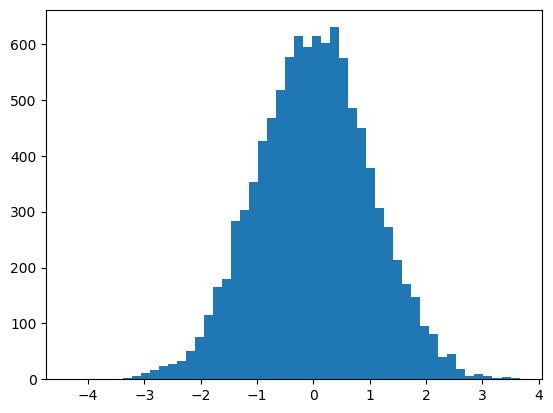

In [90]:
hist(Y, bins=50);

In [96]:
print(mean(Y))

0.013478447044043858

In [97]:
print(std(Y))

1.0143602524738233

## Bootstrap

In [98]:
function parametric_Bootstrap(ϕ, resids, obs, init)
    z = sample(resids, obs)
    y = zeros(obs);
    y[1] = init

    for t = 2:obs 
        y[t] = ϕ * y[t-1] + z[t]
    end
    
    return y
end

parametric_Bootstrap (generic function with 1 method)

In [99]:
B = 10000

10000

In [101]:
X = zeros(B);

In [102]:
for j in 1:B
    path = parametric_Bootstrap(β_hat[1], resids[1], T, 0.0)
    X[j] = path[end]
end

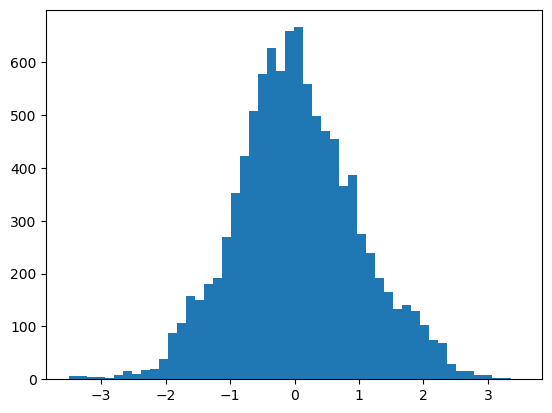

In [103]:
hist(X, bins=50);

In [104]:
mean(X)

0.03904477112904666

In [105]:
std(X)

0.9592656775636101